In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.patches as mpatches
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session
from spikeA.Intervals import Intervals
from spikeA.Spike_train import Spike_train
import spikeA.spatial_properties
from scipy.stats import mannwhitneyu


data = pd.read_csv('/home/rowena/results/summary_scores/CSVs/3control+2FAD.csv')
df = pd.DataFrame(data)

In [3]:
#Insert thresholds
df = df.loc[(df['mean_firing_rate1'] > 0.1) & (df['mean_firing_rate1'] < 10) &
       (df['refractory_period_ratio'] < 0.15) & (df.loc[:, 'grid_score1'] > df.loc[:, 'grid_score_threshold1'])]

In [4]:
data = pd.read_csv('/home/rowena/results/summary_scores/CSVs/3control+2FAD.csv')
df = pd.DataFrame(data)
print(df.shape)
#Insert thresholds for Grid Score in FAD mice
df = df.loc[(df['mean_firing_rate1'] > 0.1) & (df['mean_firing_rate1'] < 10) & 
       (df['refractory_period_ratio'] < 0.15) & (df.loc[:, 'grid_score1'] > df.loc[:, 'grid_score_threshold1']) & (df.loc[:, 'genotype'] == 'fad')]
fad_grid = df.shape[0]

(2035, 46)


In [5]:
data = pd.read_csv('/home/rowena/results/summary_scores/CSVs/3control+2FAD.csv')
df = pd.DataFrame(data)
print(df.shape)
#Insert thresholds for Grid Score in control mice
df = df.loc[(df['mean_firing_rate1'] > 0.1) & (df['mean_firing_rate1'] < 10) & 
       (df['refractory_period_ratio'] < 0.15) & (df.loc[:, 'grid_score1'] > df.loc[:, 'grid_score_threshold1']) & (df.loc[:, 'genotype'] == 'control')]
control_grid = df.shape[0]

(2035, 46)


In [6]:
data = pd.read_csv('/home/rowena/results/summary_scores/CSVs/3control+2FAD.csv')
df = pd.DataFrame(data)
print(df.shape)

#show all cells, without grid score threshold for FAD
df = df.loc[(df['mean_firing_rate1'] > 0.1) & (df['mean_firing_rate1'] < 10) & 
       (df['refractory_period_ratio'] < 0.15) & (df.loc[:, 'genotype'] == 'fad')]
fad_all=df.shape[0]

(2035, 46)


In [7]:
data = pd.read_csv('/home/rowena/results/summary_scores/CSVs/3control+2FAD.csv')
df = pd.DataFrame(data)
print(df.shape)

#Show all cells, without grid score threshold for control
df = df.loc[(df['mean_firing_rate1'] > 0.1) & (df['mean_firing_rate1'] < 10) & 
       (df['refractory_period_ratio'] < 0.15) & (df.loc[:, 'genotype'] == 'control')]
control_all = df.shape[0]

(2035, 46)


https://github.com/kevin-allen/dataScienceNeuro/blob/main/notebooks/preparing_figures.ipynb

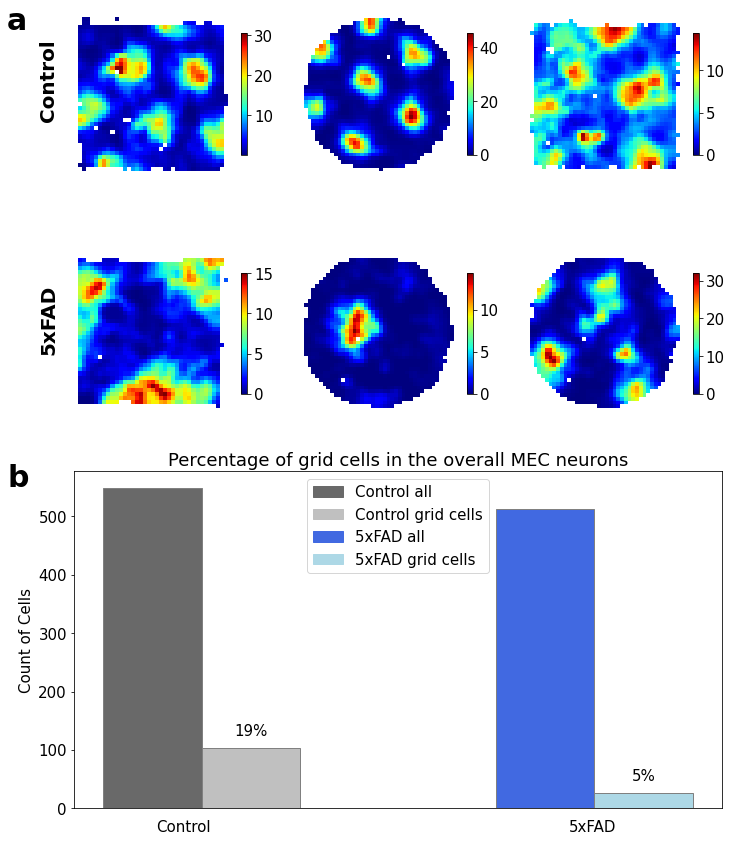

In [8]:
plt.rcParams['font.size'] = '15'
fig = plt.figure(figsize=(10,15), constrained_layout=False) 
layout = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.95, wspace=0.15, hspace=0.15, height_ratios= [15,15,25])

ax0= fig.add_subplot(layout[0, 2])
im0=np.load("/home/rowena/results/summary_scores/bt1316/frmap-02112022-2.npy")
im=ax0.imshow(im0, cmap='jet', vmin=0)
fig.colorbar(im, ax=ax0, shrink=0.6)
ax0.axis('off')

#ax0=plt.title(f"{5.65544546385938:.3} Hz")
ax1= fig.add_subplot(layout[0, 1])
ax1=np.load("/home/rowena/results/summary_scores/bt1296/frmap-29102022-35.npy")
ax1=plt.imshow(ax1, cmap='jet', vmin=0)
fig.colorbar(ax1, shrink=0.6)
ax1=plt.axis('off')
#ax1=plt.title(f"{3.59498553711256:.3} Hz")
ax2= fig.add_subplot(layout[0, 0])
ax2=np.load("/home/rowena/results/summary_scores/bt1258/frmap-05112022-15.npy")
ax2=plt.imshow(ax2, cmap='jet')
fig.colorbar(ax2, shrink=0.6)
ax2=plt.axis('off')
ax3= fig.add_subplot(layout[1, 0])
ax3=np.load("/home/rowena/results/summary_scores/bt0410/frmap-10102022-8.npy")
ax3=plt.imshow(ax3, cmap='jet', vmin=0)
fig.colorbar(ax3, shrink=0.6)
ax3=plt.axis('off')
#ax3=plt.title(f"{3.8397625541714:.3} Hz")
ax4= fig.add_subplot(layout[1, 2])
ax4=np.load("/home/rowena/results/summary_scores/bt0496/frmap-21112022-2.npy")
ax4=plt.imshow(ax4, cmap='jet', vmin=0)
fig.colorbar(ax4, shrink=0.6)
ax4=plt.axis('off')
ax5= fig.add_subplot(layout[1, 1])
ax5=np.load("/home/rowena/results/summary_scores/bt0496/frmap-21112022-59.npy")
ax5=plt.imshow(ax5, cmap='jet', vmin=0)
fig.colorbar(ax5, shrink=0.6)
ax5=plt.axis('off')

ax0.text(-3.1, 0.35, "Control", rotation=90, fontsize=20, weight='bold', transform=ax0.transAxes)
ax3=plt.text(-70, 25, "5xFAD", rotation=90, fontsize=20, weight='bold')
ax0.text(-3.3,0.91, "a", fontsize=30, weight='bold', transform=ax0.transAxes)

ax6= fig.add_subplot(layout[2, :])



# set width of bar
barWidth = 0.25
 
# set height of bar
MEC_Neurons = [control_all, fad_all]
Grid_Cells = [control_grid, fad_grid]
 
# Set position of bar on X axis
br1 = np.arange(len(MEC_Neurons))
br2 = [x + barWidth for x in br1]
 
# Make the plot
ax6.bar(br1, MEC_Neurons, color =['dimgrey', 'royalblue'], width = barWidth,
        edgecolor ='grey')
ax6.bar(br2, Grid_Cells, color =['silver','lightblue'], width = barWidth,
        edgecolor ='grey')
 
# Adding Xticks
ax6.set_xticks([])
ax6.set_xticklabels('')
ax6.text(0.01, -40, "Control")
ax6.text(1.06, -40, "5xFAD")
ax6.set_ylabel("Count of Cells", fontsize = 15)
dimgrey_patch = mpatches.Patch(color='dimgrey', label='Control all')
silver_patch = mpatches.Patch(color='silver', label='Control grid cells')
royalblue_patch = mpatches.Patch(color='royalblue', label='5xFAD all')
lightblue_patch = mpatches.Patch(color='lightblue', label='5xFAD grid cells')
ax6.legend(handles=[dimgrey_patch, silver_patch, royalblue_patch, lightblue_patch], loc='upper center')

for i,p in enumerate([ax6.patches[2],ax6.patches[3]]):
    percentage ='{:,.0f}%'.format(Grid_Cells[i]/MEC_Neurons[i]*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width/2
    y=p.get_y()+height+20
    ax6.annotate(percentage,(x,y), ha='center')

#ax3.set_xlabel('FAD')
ax6.text(-3.3,-2, "b", fontsize=30, weight='bold', transform=ax0.transAxes)
ax6.set_title('Percentage of grid cells in the overall MEC neurons')
plt.show()

#save_results_to = '/home/rowena/results/summary_scores/figures/'
#plt.savefig(save_results_to + 'quantity_of_grid_cells.pdf')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.patches as mpatches
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session
from spikeA.Intervals import Intervals
from spikeA.Spike_train import Spike_train
import spikeA.spatial_properties


data = pd.read_csv('/home/rowena/results/summary_scores/CSVs/3control+2FAD.csv')
df = pd.DataFrame(data)

In [2]:
#Insert thresholds
df = df.loc[(df['mean_firing_rate1'] > 0.1) & (df['mean_firing_rate1'] < 10) &
       (df['refractory_period_ratio'] < 0.15) & (df.loc[:, 'grid_score1'] > df.loc[:, 'grid_score_threshold1'])]

In [10]:
mouse='bt0410'

df_cut=df[['mouse','session','cell_number','grid_score1', 'max_firing_rate1', 'info_score1']]
df_cut.loc[df_cut.loc[:,'mouse']==mouse,:]

,mouse,session,cell_number,grid_score1,max_firing_rate1,info_score1
0,bt0410,bt0410-08102022-0105,0,0.577835,10.758671,0.811872
24,bt0410,bt0410-10102022-0105,8,1.033762,5.891295,0.982663
33,bt0410,bt0410-12102022-0105,0,1.065912,11.634744,0.626358
34,bt0410,bt0410-12102022-0105,1,0.532556,5.849446,0.781889
82,bt0410,bt0410-27092022-0105,2,0.436420,4.976921,0.451855
83,bt0410,bt0410-27092022-0105,3,0.602802,5.547387,0.676003
116,bt0410,bt0410-04102022-0105,4,0.762064,8.210613,0.898404


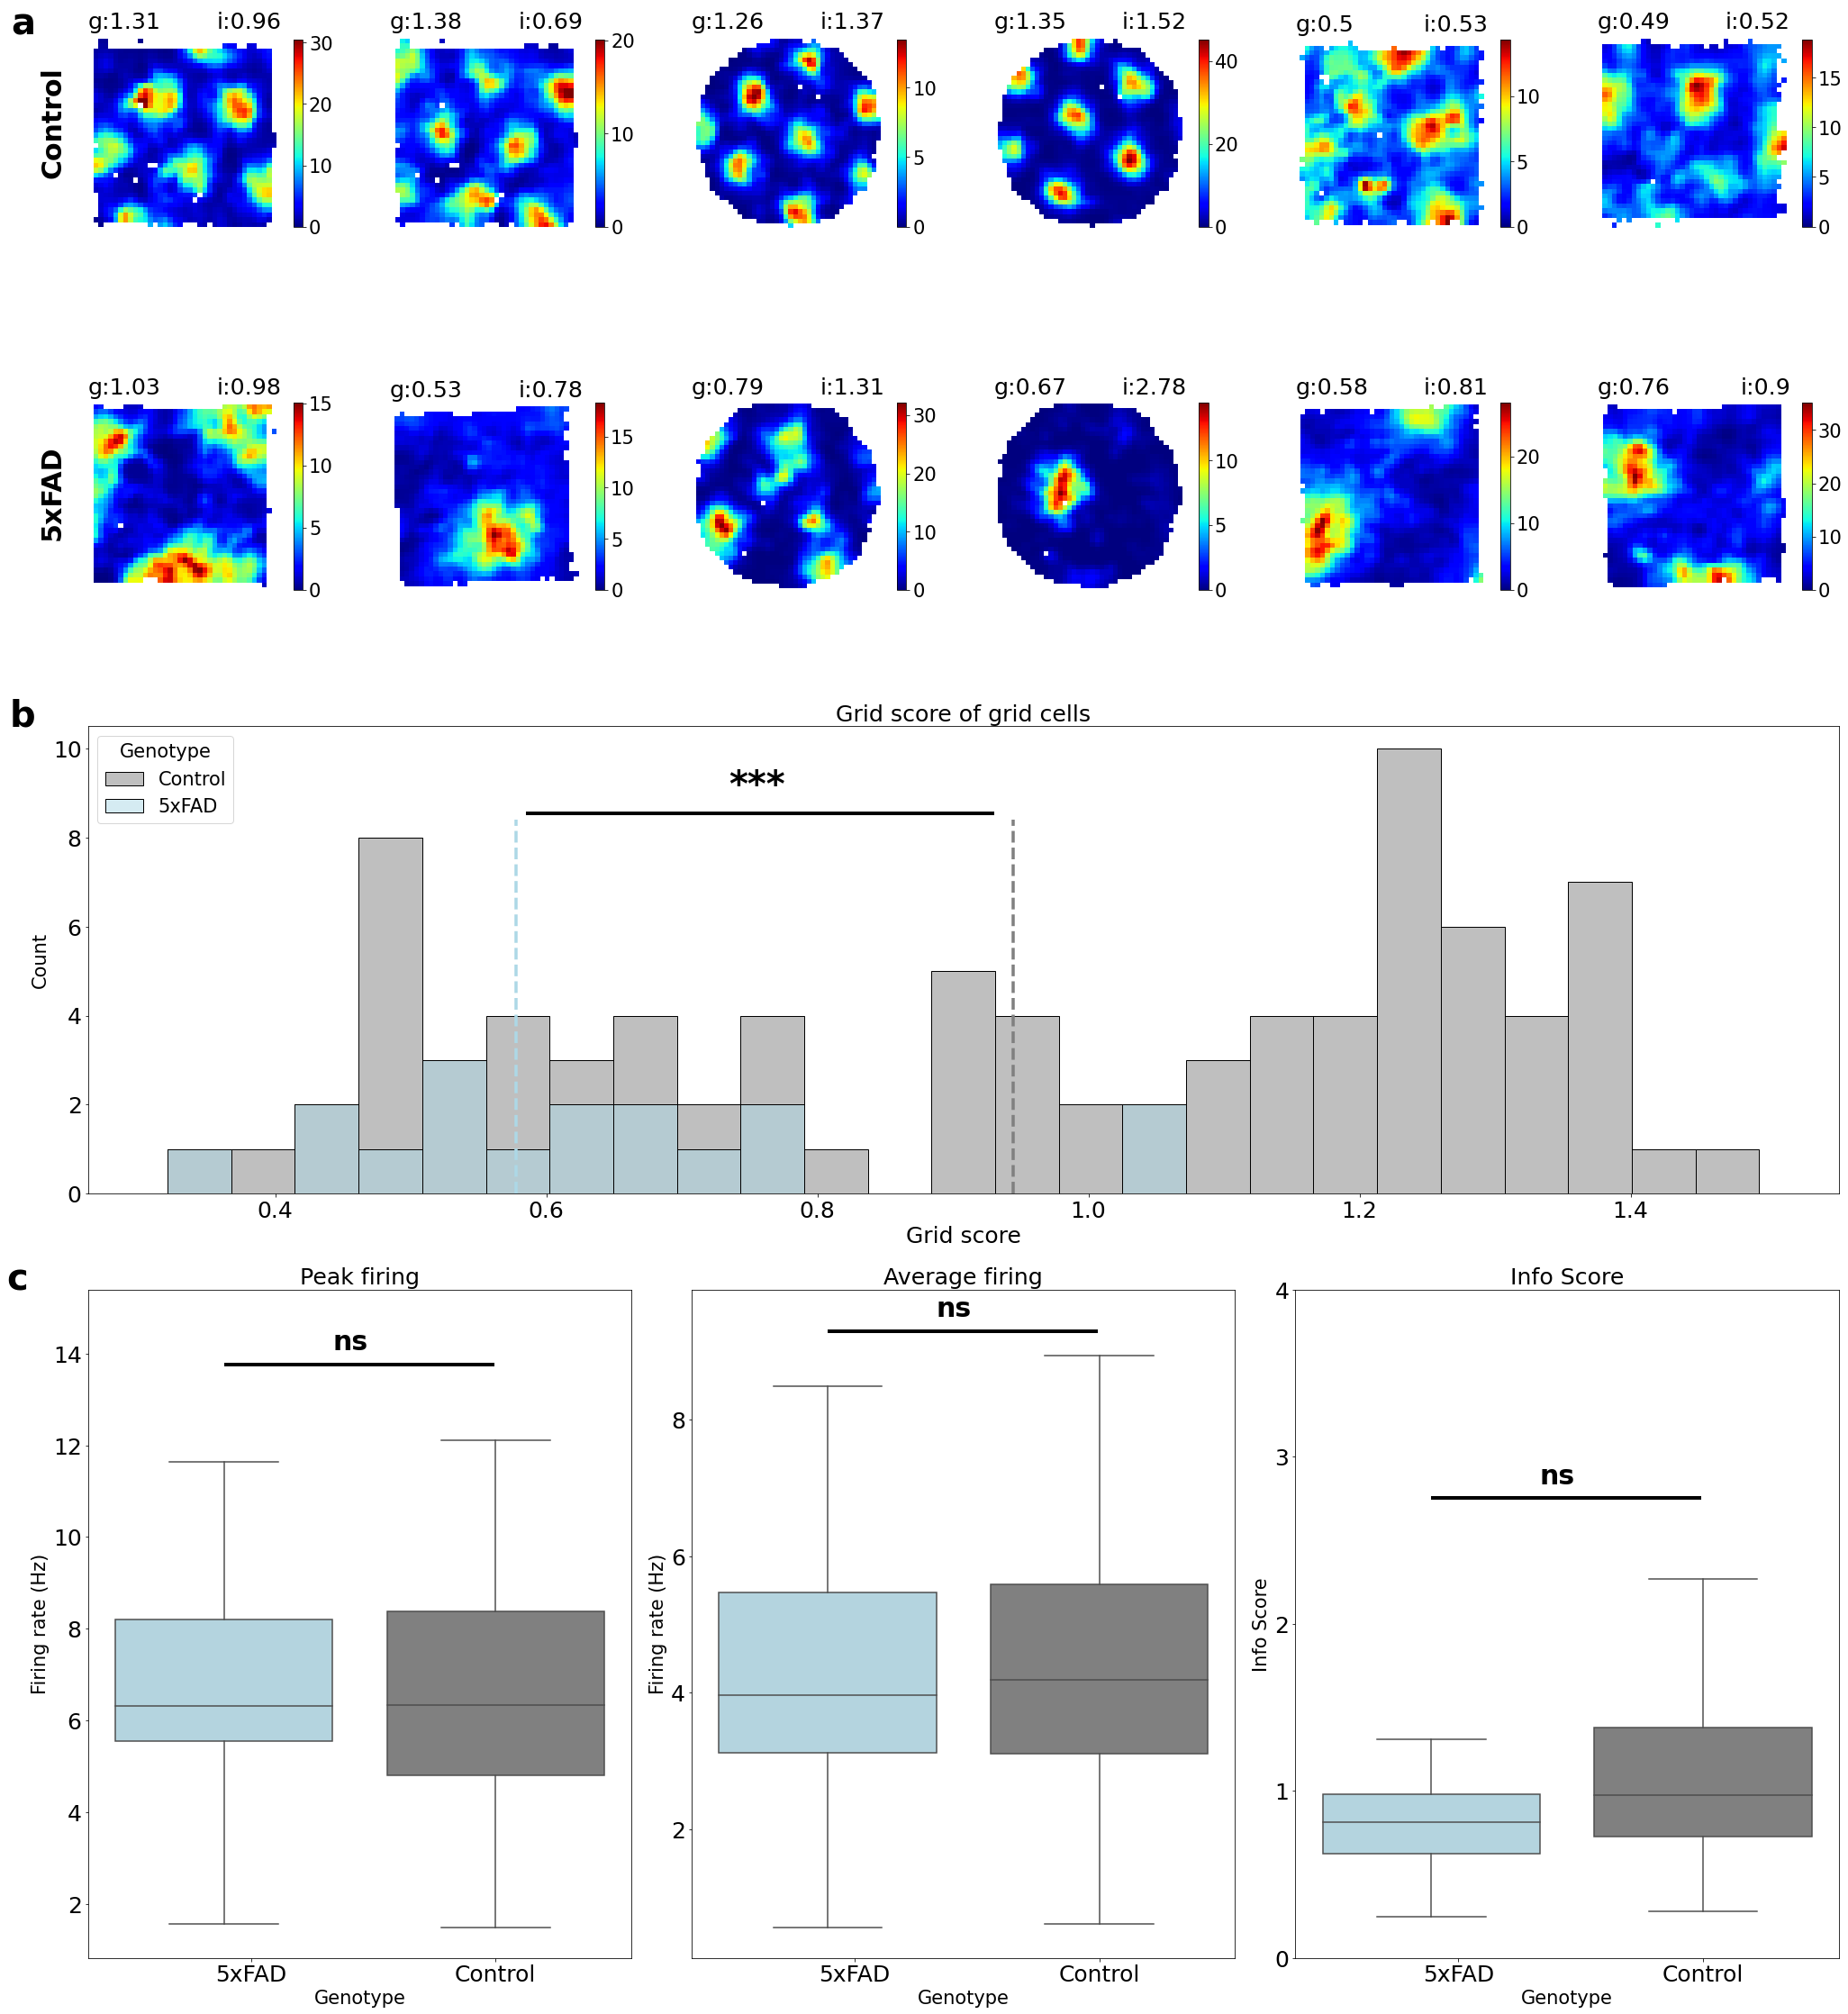

In [301]:
# Quality of the grid cells
plt.rcParams['font.size'] = '21'
df1 = df[["genotype", "mean_firing_rate1", "grid_score1", "max_firing_rate1", "info_score1", "grid_spacing1", "mean_field_size1", "mouse", "session", "cell_number"]]
df = df1.dropna()
fig = plt.figure(figsize=(30,40), constrained_layout=False)
layout = fig.add_gridspec(nrows=4, ncols=6, left=0.05, right=0.95, wspace=0.25, hspace=0.23, height_ratios= [0.4,0.4,0.7,1])
palette={"control":"grey","fad":"lightblue"}

ax0= fig.add_subplot(layout[3, 0:2])
sns.boxplot(x="genotype", y="max_firing_rate1", data=df1, palette=palette, fliersize=0).set(xlabel='Genotype', ylabel='Firing rate (Hz)', title='Peak firing')
plt.tick_params(axis='both', labelsize='25')
plt.text(0.25,0.9, "_______________", fontsize=40, weight='bold', transform=ax0.transAxes)
ax0.set_xticks(ticks=[0.1,1],labels=['5xFAD', 'Control'])

ax1 = fig.add_subplot(layout[3, 4:6])
plt.text(0.25,0.7, "_______________", fontsize=40, weight='bold', transform=ax1.transAxes)
sns.boxplot(x="genotype", y="info_score1", data=df1, palette=palette, fliersize=0).set(xlabel='Genotype', ylabel='Info Score', title='Info Score')
plt.tick_params(axis='both', labelsize='25')
ax1.set_xticks(ticks=[0.1,1],labels=['5xFAD', 'Control'])
ax1.set_yticks([0, 1 ,2 ,3, 4])


ax2 = fig.add_subplot(layout[3,2:4])
sns.boxplot(x="genotype", y="mean_firing_rate1", data=df1, palette=palette, fliersize=0).set(xlabel='Genotype', ylabel='Firing rate (Hz)', title='Average firing')
plt.tick_params(axis='both', labelsize='25')
plt.text(0.25,0.95, "_______________", fontsize=40, weight='bold', transform=ax2.transAxes)
ax2.set_xticks(ticks=[0.1,1],labels=['5xFAD', 'Control'])

ax3 = fig.add_subplot(layout[2, :])
ax3=sns.histplot(data=df, x='grid_score1', hue='genotype', palette=palette, bins=25)
plt.tick_params(axis='both', labelsize='25')
plt.legend(title='Genotype', loc='upper left', labels=['Control', '5xFAD'])
plt.axvline(x=0.944710, ymin=0, ymax=0.8, ls='--', color='grey', linewidth=3.5, label='Control')
plt.axvline(x=0.577835, ymin=0, ymax=0.8, ls='--', color='lightblue',linewidth=3.5, label='5xFAD')
plt.text(0.25,0.83, "__________________________", fontsize=40, weight='bold', transform=ax3.transAxes)
#plt.text(
ax3.set_xlabel('Grid score', fontsize='25')
ax3.set_title('Grid score of grid cells')

ax4= fig.add_subplot(layout[0, 4])
im4=np.load("/home/rowena/results/summary_scores/bt1316/frmap-02112022-2.npy")
ax4=plt.imshow(im4, cmap='jet', vmin=0)
fig.colorbar(ax4, shrink=0.7)
ax4=plt.axis('off')
ax4=plt.title(f"g:{0.502458:.2}", loc='left')
ax4=plt.title(f"i:{0.528308695183056:.2}", loc='right')

ax5= fig.add_subplot(layout[0, 5])
im5=np.load("/home/rowena/results/summary_scores/bt1316/frmap-31102022-38.npy")
ax5=plt.imshow(im5, cmap='jet', vmin=0)
fig.colorbar(ax5, shrink=0.7)
ax5=plt.axis('off')
ax5=plt.title(f"g:{0.485583:.2}", loc='left')
ax5=plt.title(f"i:{0.522788:.2}", loc='right')

ax6= fig.add_subplot(layout[0, 2])
im6=np.load("/home/rowena/results/summary_scores/bt1296/frmap-29102022-31.npy")
ax6=plt.imshow(im6, cmap='jet', vmin=0)
fig.colorbar(ax6, shrink=0.7)
ax6=plt.axis('off')
ax6=plt.title(f"g:{1.258325:.3}", loc='left')
ax6=plt.title(f"i:{1.374358:.3}", loc='right')

ax7= fig.add_subplot(layout[0, 3])
im7=np.load("/home/rowena/results/summary_scores/bt1296/frmap-29102022-35.npy")
ax7=plt.imshow(im7, cmap='jet', vmin=0)
fig.colorbar(ax7, shrink=0.7)
ax7=plt.axis('off')
ax7=plt.title(f"g:{1.346709:.3}", loc='left')
ax7=plt.title(f"i:{1.524577:.3}", loc='right')

ax8= fig.add_subplot(layout[1, 0])
im8=np.load("/home/rowena/results/summary_scores/bt0410/frmap-10102022-8.npy")
im=ax8.imshow(im8, cmap='jet', vmin=0)
fig.colorbar(im, ax=ax8, shrink=0.7)
ax8.axis('off')
ax8.set_title(f"g:{1.033762:.3}", loc='left')
ax8.set_title(f"i:{0.982663:.2}", loc='right')

ax9= fig.add_subplot(layout[1, 1])
im9=np.load("/home/rowena/results/summary_scores/bt0410/frmap-12102022-1.npy")
ax9=plt.imshow(im9, cmap='jet', vmin=0)
fig.colorbar(ax9, shrink=0.7)
ax9=plt.axis('off')
ax9=plt.title(f"g:{0.532556:.2}", loc='left')
ax9=plt.title(f"i:{0.781889:.2}", loc='right')

ax10= fig.add_subplot(layout[1, 2])
im10=np.load("/home/rowena/results/summary_scores/bt0496/frmap-21112022-2.npy")
ax10=plt.imshow(im10, cmap='jet', vmin=0)
fig.colorbar(ax10, shrink=0.7)
ax10=plt.axis('off')
ax10=plt.title(f"g:{0.785344:.2}", loc='left')
ax10=plt.title(f"i:{1.310751:.3}", loc='right')

ax13= fig.add_subplot(layout[1, 3])
im13=np.load("/home/rowena/results/summary_scores/bt0496/frmap-21112022-59.npy")
ax13=plt.imshow(im13, cmap='jet', vmin=0)
fig.colorbar(ax13, shrink=0.7)
ax13=plt.axis('off')
ax13=plt.title(f"g:{0.673842:.2}", loc='left')
ax13=plt.title(f"i:{2.778445:.3}", loc='right')

ax11= fig.add_subplot(layout[0, 0])
im11=np.load("/home/rowena/results/summary_scores/bt1258/frmap-05112022-15.npy")
im=ax11.imshow(im11, cmap='jet', vmin=0)
fig.colorbar(im,ax=ax11, shrink=0.7)
ax11.axis('off')
ax11.set_title(f"g:{1.307167:.3}", loc='left')
ax11.set_title(f"i:{0.958677:.2}", loc='right')

ax12= fig.add_subplot(layout[0, 1])
im12=np.load("/home/rowena/results/summary_scores/bt1258/frmap-05112022-14.npy")
ax12=plt.imshow(im12, cmap='jet', vmin=0)
fig.colorbar(ax12, shrink=0.7)
ax12=plt.axis('off')
ax12=plt.title(f"g:{1.384080:.3}", loc='left')
ax12=plt.title(f"i:{0.693623:.2}", loc='right')

ax14= fig.add_subplot(layout[1, 4])
im14=np.load("/home/rowena/results/summary_scores/bt0410/frmap-08102022-0.npy")
ax14=plt.imshow(im14, cmap='jet', vmin=0)
fig.colorbar(ax14, shrink=0.7)
ax14=plt.axis('off')
ax14=plt.title(f"g:{0.577835:.2}", loc='left')
ax14=plt.title(f"i:{0.811872:.2}", loc='right')

ax15= fig.add_subplot(layout[1, 5])
ax15=np.load("/home/rowena/results/summary_scores/bt0410/frmap-04102022-4.npy")
ax15=plt.imshow(ax15, cmap='jet', vmin=0)
fig.colorbar(ax15, shrink=0.7)
ax15=plt.axis('off')
ax15=plt.title(f"g:{0.762064:.2}", loc='left')
ax15=plt.title(f"i:{0.898404:.2}", loc='right')


ax11.text(-0.25,0.3, "Control", rotation=90, fontsize=30, weight='bold', transform=ax11.transAxes)
ax8.text(-0.25, 0.3, "5xFAD", rotation=90, fontsize=30, weight='bold', transform=ax8.transAxes)
ax11.text(-0.4, 1, "a", fontsize=40, weight='bold', transform=ax11.transAxes)
ax3.text(0.366,0.85, "***", fontsize=40, weight='bold', transform=ax3.transAxes)
ax3.text(-0.045, 1, "b", fontsize=40, weight='bold', transform=ax3.transAxes)
ax0.text(0.45,0.91, "ns", fontsize=30, weight='bold', transform=ax0.transAxes)
ax0.text(-0.15, 1, "c", fontsize=40, weight='bold', transform=ax0.transAxes)
ax1.text(0.45,0.71, "ns", fontsize=30, weight='bold', transform=ax1.transAxes)
ax2=ax2.text(0.45,0.96, "ns", fontsize=30, weight='bold', transform=ax2.transAxes)



#save_results_to = '/home/rowena/results/summary_scores/figures/'
#plt.savefig(save_results_to + 'quality_of_grid_cells.pdf')

In [17]:
median=df.groupby('genotype')['grid_spacing1'].median()
median

genotype
control    32.439539
fad        46.355545
Name: grid_spacing1, dtype: float64

In [18]:
median2=df.groupby('genotype')['mean_field_size1'].median()
median2

genotype
control    162.0
fad        374.0
Name: mean_field_size1, dtype: float64

In [7]:
mouse='bt0496'

df_cut=df[['mouse','session','cell_number', 'grid_spacing1', 'mean_field_size1']]
df_cut.loc[df_cut.loc[:,'mouse']==mouse,:]

,mouse,session,cell_number,grid_spacing1,mean_field_size1
718,bt0496,bt0496-30112022-0105,70,NaN,556.0
735,bt0496,bt0496-30112022-0105,87,47.544840,1072.0
752,bt0496,bt0496-30112022-0105,104,46.355545,388.0
765,bt0496,bt0496-23112022-0105,8,NaN,112.0
910,bt0496,bt0496-02122022-0105,69,60.610620,500.0
929,bt0496,bt0496-02122022-0105,88,49.482620,NaN
930,bt0496,bt0496-02122022-0105,89,38.833831,260.0
980,bt0496,bt0496-27112022-0105,26,20.824696,NaN
1032,bt0496,bt0496-19112022-0105,9,40.363930,310.0
1125,bt0496,bt0496-21112022-0105,2,42.398396,260.0


Text(10, 40, 'c')

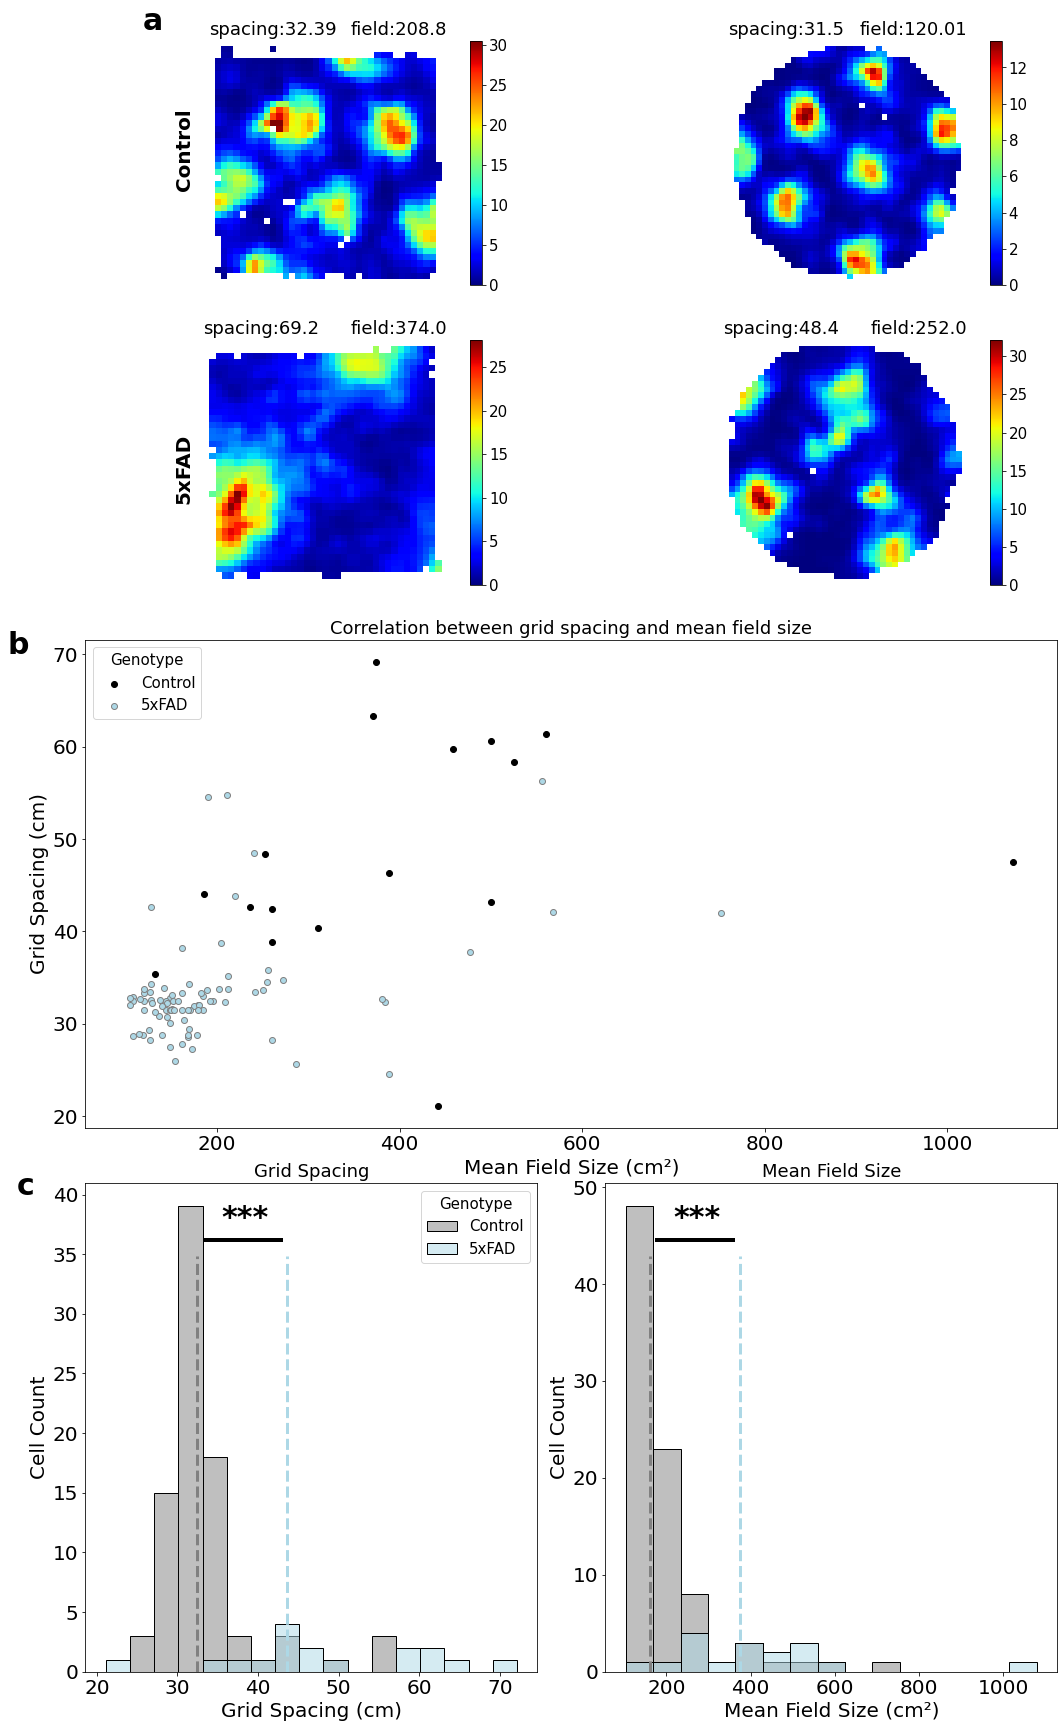

In [284]:
#Spacing of the grid cells
plt.rcParams['font.size'] = '15'
df1 = df[df['genotype'] == 'fad']
df2 = df[df['genotype'] == 'control']
palette={"fad":"lightblue", "control":"grey"}
fig = plt.figure(figsize=(15,30), constrained_layout=False) 
layout = fig.add_gridspec(nrows=4, ncols=2, left=0.05, right=0.95, wspace=0.15, hspace=0.15, height_ratios= [0.5,0.5,1,1])

ax0 = fig.add_subplot(layout[3, 0])
ax0= sns.histplot(data=df, x='grid_spacing1', hue='genotype', palette=palette, legend=False, binwidth=3)
ax0.tick_params(axis='both', labelsize='20')
plt.text(0.26,0.9, "____", fontsize=40, weight='bold', transform=ax0.transAxes)
#plt.yticks([0, 5, 10, 15, 20])
plt.legend(title='Genotype', loc='upper right', labels=['Control', '5xFAD'])
plt.axvline(x=32.399940, ymin=0, ymax=0.85, ls='--', color='grey', linewidth=3, label='Control')
plt.axvline(x=43.624342, ymin=0, ymax=0.85, ls='--', color='lightblue',linewidth=3, label='5xFAD')
ax1 = fig.add_subplot(layout[3, 1])
ax1 = sns.histplot(data=df, x='mean_field_size1', hue='genotype', palette=palette, legend=False, binwidth=65)
ax1.tick_params(axis='both', labelsize='20')
plt.text(0.11,0.9, "____", fontsize=40, weight='bold', transform=ax1.transAxes)
plt.axvline(x=162, ymin=0, ymax=0.85, ls='--', color='grey',linewidth=3, label='Control')
plt.axvline(x=374, ymin=0, ymax=0.85, ls='--', color='lightblue',linewidth=3, label='5xFAD')
ax3= fig.add_subplot(layout[2,:])
ax3.scatter (x =df1['mean_field_size1'], y =df1['grid_spacing1'], s =None, c='black', label='5xFAD', edgecolor='black')
ax3.scatter(x=df2['mean_field_size1'], y=df2['grid_spacing1'], s=None, c='lightblue', label='Control', edgecolor='grey')
ax3.tick_params(axis='both', labelsize='20')
plt.legend(title='Genotype', loc='upper left', labels=['Control', '5xFAD'])
ax4= fig.add_subplot(layout[0, 0])
im4=np.load("/home/rowena/results/summary_scores/bt1258/frmap-05112022-15.npy")
ax4=plt.imshow(im4, cmap='jet', vmin=0)
fig.colorbar(ax4)
ax4=plt.axis('off')
ax4=plt.title(f"spacing:{32.388638:.4}", loc='left')
ax4=plt.title(f"field:{208.8:.5}", loc='right')
ax5= fig.add_subplot(layout[0, 1])
im5=np.load("/home/rowena/results/summary_scores/bt1296/frmap-29102022-31.npy")
ax5=plt.imshow(im5, cmap='jet', vmin=0)
fig.colorbar(ax5)
ax5=plt.axis('off')
ax5=plt.title(f"spacing:{31.461119:.3}", loc='left')
ax5=plt.title(f"field:{120.01:.5}", loc='right')
ax6= fig.add_subplot(layout[1, 1])
im6=np.load("/home/rowena/results/summary_scores/bt0496/frmap-21112022-2.npy")
ax6=plt.imshow(im6, cmap='jet', vmin=0)
fig.colorbar(ax6)
ax6=plt.axis('off')
ax6=plt.title(f"spacing:{48.435:.3}", loc='left')
ax6=plt.title(f"field:{252.0:.5}", loc='right')
ax7= fig.add_subplot(layout[1, 0])
im7=np.load("/home/rowena/results/summary_scores/bt0410/frmap-08102022-0.npy")
ax7=plt.imshow(im7, cmap='jet', vmin=0)
fig.colorbar(ax7)
ax7=plt.axis('off')
ax7=plt.title(f"spacing:{69.180705:.3}", loc='left')
ax7=plt.title(f"field:{374.0:.5}", loc='right')
#ax8= fig.add_subplot(layout[1, 0])
#im8=np.load("/home/rowena/results/summary_scores/bt0496/frmap-02122022-69.npy")
#ax8=plt.imshow(im8, cmap='jet', vmin=0)
#fig.colorbar(ax8)
#ax8=plt.axis('off')
#ax8=plt.title(f"spacing:{63.318384:.3}", loc='left')
#ax8=plt.title(f"field:{370.666:.5}", loc='right')


ax4=plt.text(-5, -25, "Control", rotation=90, fontsize=20, weight='bold')
ax4=plt.text(-10, -50, "a", fontsize=30, weight='bold')
ax7=plt.text(-5, 25, "5xFAD", rotation=90, fontsize=20, weight='bold')
ax0.text(0.3,0.91, "***", fontsize=30, weight='bold', transform=ax0.transAxes)
ax1.text(0.15,0.91, "***", fontsize=30, weight='bold', transform=ax1.transAxes)

ax0.set_xlabel("Grid Spacing (cm)", fontsize='20')
ax1.set_xlabel("Mean Field Size (cm²)", fontsize='20')
ax0.set_ylabel("Cell Count", fontsize='20')
ax1.set_ylabel("Cell Count", fontsize='20')
ax3.set_xlabel("Mean Field Size (cm²)", fontsize='20')
ax3.set_ylabel("Grid Spacing (cm)", fontsize='20')
ax0.set_title("Grid Spacing")
ax1.set_title("Mean Field Size")
ax3.set_title("Correlation between grid spacing and mean field size")
ax3.text(-30, 70, "b", fontsize=30, weight='bold')
ax0.text(10, 40, "c", fontsize=30, weight='bold')

#save_results_to = '/home/rowena/results/summary_scores/figures/'
#plt.savefig(save_results_to + 'grid_spacing.pdf')

In [3]:
#get firing rate map of grid cells with highest grid score
mouse="bt1296"
date="29102022"
name=f"{mouse}-{date}-0105"
path=f"/adata/electro/{mouse}/{name}/"
cellnumber=35

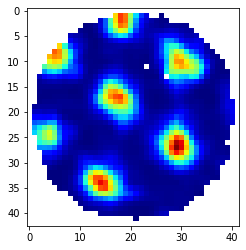

In [4]:
ses = Kilosort_session(name=name,path=path)
ses.load_parameters_from_files()
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
cg = Cell_group(stl)
ap = Animal_pose(ses)
ap.load_pose_from_file()
first_trial_inter = ses.trial_intervals.inter[0,:]
n=cg.neuron_list[cellnumber]
n.spike_train.set_intervals(first_trial_inter)
ap.set_intervals(first_trial_inter)
n.set_spatial_properties(ap)
n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm =2, smoothing=True)
frmap=n.spatial_properties.firing_rate_map
plt.imshow(frmap, cmap='jet')

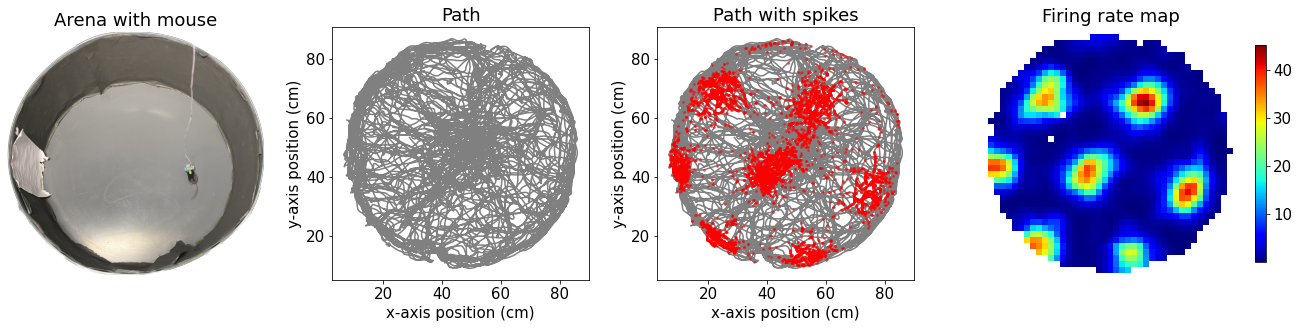

In [6]:
plt.rcParams['font.size'] = '15'
fig = plt.figure(figsize=(20, 20), constrained_layout=False) 
layout = fig.add_gridspec(nrows=1, ncols=4, left=0.05, right=0.95, wspace=0.25, hspace=0.15, height_ratios= [1], width_ratios= [1,1,1,1.25])

ax0= fig.add_subplot(layout[0, 2])
ax0=plt.plot(ap.pose[:,1],ap.pose[:,2],color="gray")
ax0=plt.gca() #you first need to get the axis handle
ax0.set_aspect(1)
plt.ylabel("y-axis position (cm)")
plt.xlabel("x-axis position (cm)")
plt.title("Path with spikes")
n.spatial_properties.spike_position()
plt.scatter(n.spatial_properties.spike_posi[:,0],n.spatial_properties.spike_posi[:,1],zorder=3,alpha=0.5,s=3,color="red")

ax1= fig.add_subplot(layout[0, 3])
ax1=np.load(f"/home/rowena/results/summary_scores/{mouse}/frmap-{date}-{cellnumber}.npy")
ax1=plt.imshow(frmap.T, cmap='jet',origin="lower",aspect=1)
fig.colorbar(ax1, shrink=0.2)
ax1=plt.axis("off")
plt.title("Firing rate map")
#
ax2= fig.add_subplot(layout[0, 1])
ax2=plt.plot(ap.pose[:,1],ap.pose[:,2],color="gray")
ax2=plt.gca() #you first need to get the axis handle
ax2.set_aspect(1)
plt.ylabel("y-axis position (cm)")
plt.xlabel("x-axis position (cm)")
plt.title("Path")
#n.spatial_properties.spike_position()
#plt.scatter(n.spatial_properties.spike_posi[:,0],n.spatial_properties.spike_posi[:,1],zorder=3,alpha=0.5,s=3,color="red")

ax3 = fig.add_subplot(layout[0, 0])
ax3 = plt.imread(f"/home/rowena/results/summary_scores/figures/Arenawithmouse.PNG")
plt.imshow(ax3)
ax3=plt.axis("off")
plt.title("Arena with mouse")

save_results_to = '/home/rowena/results/summary_scores/figures/'
plt.savefig(save_results_to + 'Path_Map.pdf')

In [21]:
#Statistical Analysis

In [245]:
var='mean_field_size1'
df_nona=df.dropna(subset=[var])
c=df_nona.loc[df_nona.loc[:,'genotype']=='control',var]
f=df_nona.loc[df_nona.loc[:,'genotype']=='fad',var]

results1 = mannwhitneyu(c, f, method="auto")
results1

MannwhitneyuResult(statistic=183.0, pvalue=1.1477074033028843e-06)

In [ ]:
#Median

In [4]:
median=df.groupby('genotype')['grid_spacing1'].median()
median

genotype
control    32.399940
fad        43.624342
Name: grid_spacing1, dtype: float64

In [7]:
median2=df.groupby('genotype')['mean_field_size1'].median()
median2

genotype
control    162.0
fad        374.0
Name: mean_field_size1, dtype: float64

In [8]:
median=df.groupby('genotype')['grid_score1'].median()
median

genotype
control    0.944710
fad        0.577835
Name: grid_score1, dtype: float64